# Demo 6: Training Hyperparamters

Regularization helps interpretability by making KANs sparser. This may require some hyperparamter tuning. Let's see how hyperparameters can affect training

Load KAN and create_dataset

In [1]:
from kan import KAN, create_dataset
import torch

f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Default setup

train loss: 1.69e-01 | test loss: 1.50e-01 | reg: 5.01e+00 : 100%|██| 20/20 [00:12<00:00,  1.59it/s]


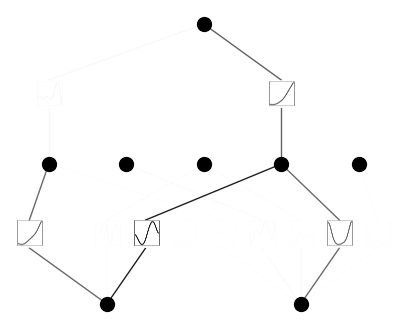

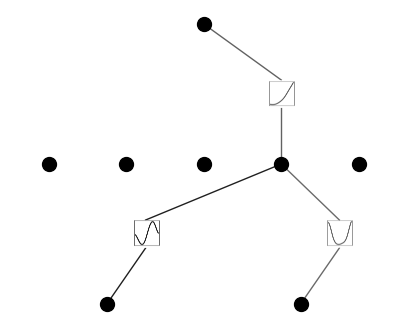

In [2]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.1);
model.plot()
model.prune()
model.plot(mask=True)

### Parameter 1: $\lambda$, overall penalty strength. 

Previously $\lambda=0.1$, now we try different $\lambda$.

$\lambda=0$

train loss: 4.16e-03 | test loss: 5.00e-03 | reg: 1.24e+01 : 100%|██| 20/20 [00:10<00:00,  1.86it/s]


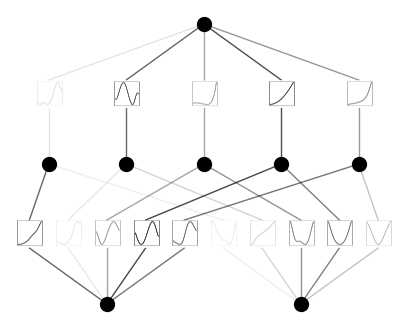

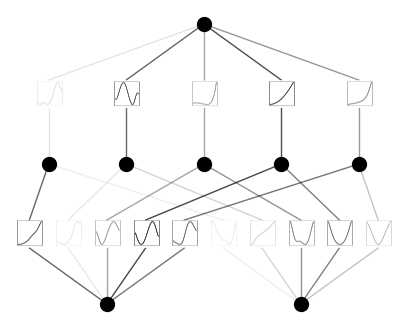

In [3]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.00);
model.plot()
model.prune()
model.plot(mask=True)

$\lambda=10^{-2}$

train loss: 6.01e-01 | test loss: 5.65e-01 | reg: 1.78e+01 : 100%|██| 20/20 [00:13<00:00,  1.51it/s]


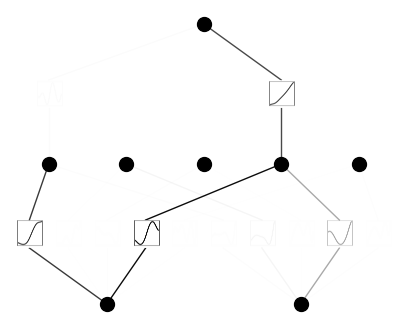

In [4]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.1, lamb_entropy=10.);
model.plot()
model.prune()
model.plot(mask=True)

$\lambda=1$

train loss: 1.09e+00 | test loss: 1.02e+00 | reg: 5.18e+00 : 100%|██| 20/20 [00:11<00:00,  1.67it/s]


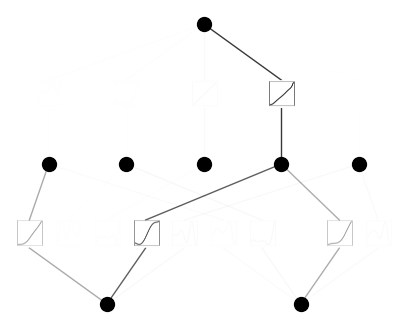

In [5]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=1);
model.plot()
model.prune()
model.plot(mask=True)

### Parameter 2: (relative) penalty strength of entropy $\lambda_{\rm ent}$.

The absolute magnitude is $\lambda\lambda_{\rm ent}$. Previously we set $\lambda=0.1$ and $\lambda_{\rm ent}=10.0$. Below we fix $\lambda=0.1$ and vary $\lambda_{\rm ent}$.

$\lambda_{\rm ent}=0.0$

train loss: 8.90e-02 | test loss: 8.40e-02 | reg: 1.68e+00 : 100%|██| 20/20 [00:12<00:00,  1.65it/s]


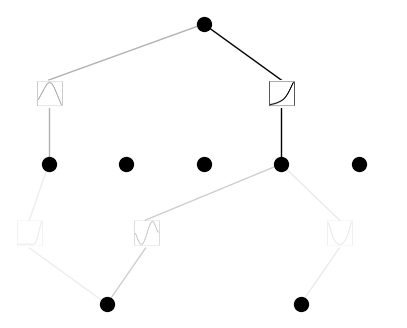

In [6]:
# train the model
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.1, lamb_entropy=0.0);
model.plot()
model.prune()
model.plot(mask=True)

$\lambda_{\rm ent}=10.$

train loss: 6.03e-01 | test loss: 5.67e-01 | reg: 1.77e+01 : 100%|██| 20/20 [00:10<00:00,  1.89it/s]


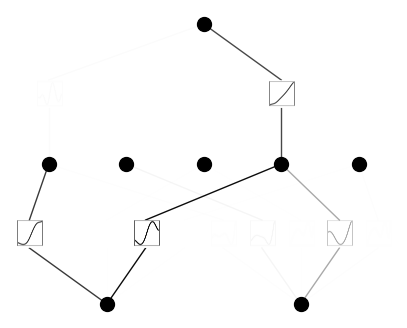

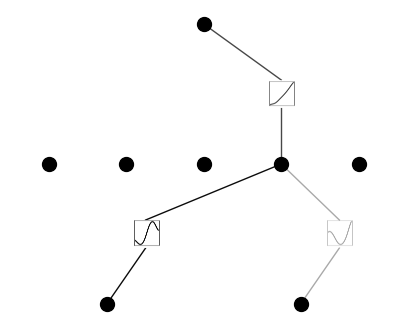

In [7]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.1, lamb_entropy=10.0);
model.plot()
model.prune()
model.plot(mask=True)

$\lambda_{\rm ent}=100.$

train loss: 1.60e+00 | test loss: 1.54e+00 | reg: 2.69e+02 : 100%|██| 20/20 [00:11<00:00,  1.67it/s]


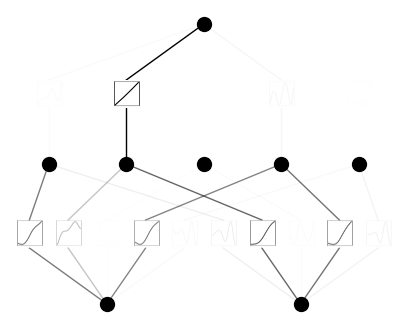

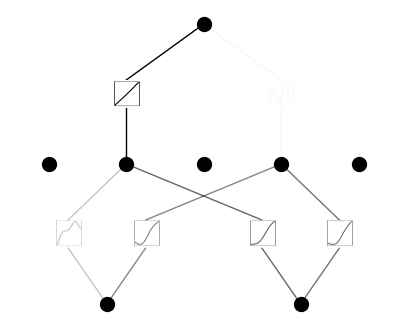

In [8]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.1, lamb_entropy=100.0);
model.plot()
model.prune()
model.plot(mask=True)

### Parameter 3: Grid size $G$. 

Previously we set $G=5$, we vary $G$ below.

$G=1$

train loss: 1.41e-01 | test loss: 1.33e-01 | reg: 1.01e+01 : 100%|██| 20/20 [00:06<00:00,  2.95it/s]


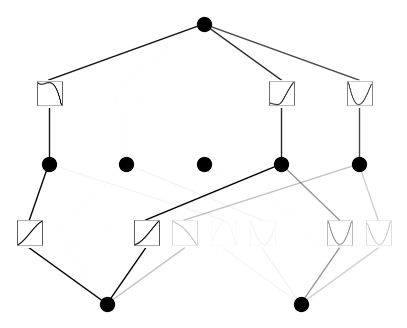

In [9]:
model = KAN(width=[2,5,1], grid=1, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=2.);
model.plot()
model.prune()
model.plot(mask=True)

$G=3$

In [10]:
model = KAN(width=[2,5,1], grid=3, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=2.);
model.plot()
model.prune()
model.plot(mask=True)

train loss: 6.18e-02 | test loss: 5.66e-02 | reg: 5.93e+00 : 100%|██| 20/20 [00:11<00:00,  1.76it/s]


$G=5$

train loss: 7.47e-02 | test loss: 6.52e-02 | reg: 6.12e+00 : 100%|██| 20/20 [00:12<00:00,  1.58it/s]


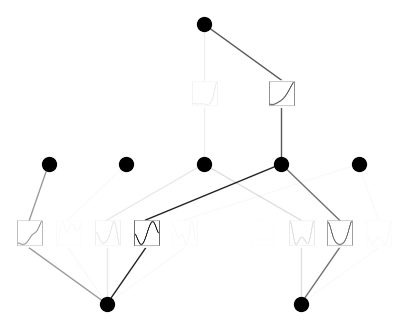

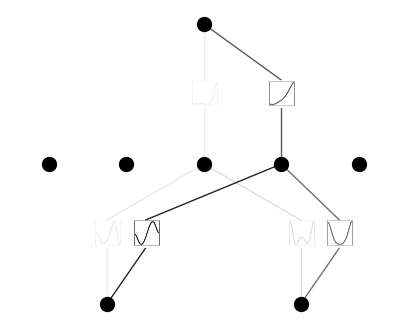

In [11]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=2.);
model.plot()
model.prune()
model.plot(mask=True)

$G=10$

train loss: 8.08e-02 | test loss: 7.24e-02 | reg: 5.89e+00 : 100%|██| 20/20 [00:13<00:00,  1.44it/s]


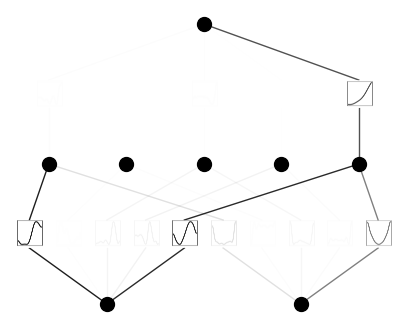

In [12]:
model = KAN(width=[2,5,1], grid=10, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=2.);
model.plot()
model.prune()
model.plot(mask=True)

$G=20$

train loss: 5.14e-02 | test loss: 5.50e-02 | reg: 7.70e+00 : 100%|██| 20/20 [00:16<00:00,  1.23it/s]


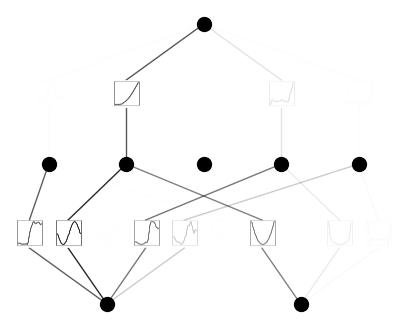

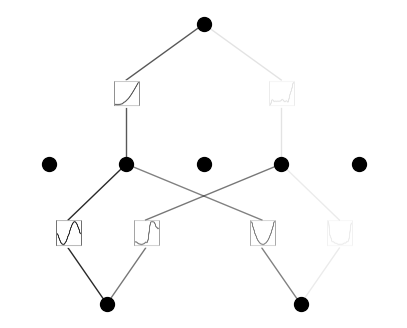

In [13]:
model = KAN(width=[2,5,1], grid=20, k=3, seed=0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=2.);
model.plot()
model.prune()
model.plot(mask=True)

### Parameter 4: seed. 

Previously we use seed = 0. Below we vary seed.

${\rm seed} = 1$

In [14]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=1, noise_scale_base=0.0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model.plot()
model.prune()
model.plot(mask=True)

train loss: 5.58e-02 | test loss: 5.50e-02 | reg: 8.48e+00 : 100%|██| 20/20 [00:13<00:00,  1.50it/s]


${\rm seed} = 42$

train loss: 1.43e-01 | test loss: 1.25e-01 | reg: 1.85e+01 : 100%|██| 20/20 [00:12<00:00,  1.65it/s]


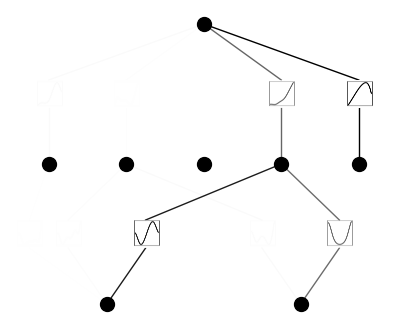

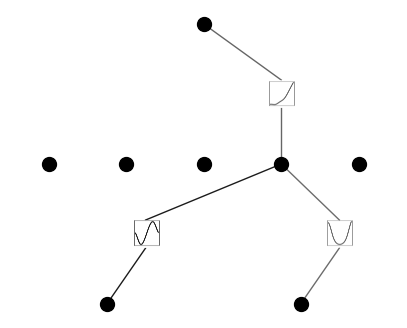

In [15]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=42, noise_scale_base=0.0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model.plot()
model.prune()
model.plot(mask=True)

${\rm seed} = 2024$

train loss: 1.50e-01 | test loss: 1.39e-01 | reg: 2.37e+01 : 100%|██| 20/20 [00:12<00:00,  1.57it/s]


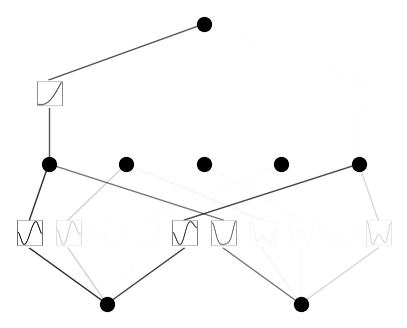

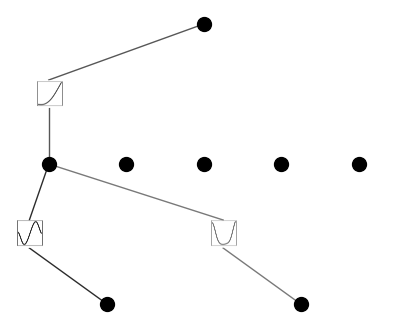

In [16]:
model = KAN(width=[2,5,1], grid=5, k=3, seed=2024, noise_scale_base=0.0)
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);
model.plot()
model.prune()
model.plot(mask=True)